In [61]:

%matplotlib widget
import numpy as np
import math
from matplotlib import cm
import pandas as pd
import scipy as sp
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib as matlib
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import LinearSVC
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D

def read_data(filename):  
    df = pd.read_csv(filename)
    df.columns = ["X1","X2","y"]
    X1=df.iloc[:,0]
    X2=df.iloc[:,1]
    y=df.iloc[:,2]
    return X1, X2, y

In [62]:

def plot_data(X1, X2, y):
    fig = plt.figure()
    X=np.column_stack((X1,X2))
    X_m1 = X[np.where(y == -1)]
    X_p1 = X[np.where(y == 1)]
    plt.scatter(X_m1[:, 0], X_m1[:, 1], c='g', marker='+', s=30)
    plt.scatter(X_p1[:, 0], X_p1[:, 1], c='b', marker='+', s=30)
    plt.xlabel('Feature X1')
    plt.ylabel('Feature X2')
    plt.title('Dataset Scatterplot')
    plt.show()
    
X1, X2, y = read_data("week4.csv")
plot_data(X1,X2,y)

X1, X2, y = read_data("week4_1.csv")
plot_data(X1,X2,y)

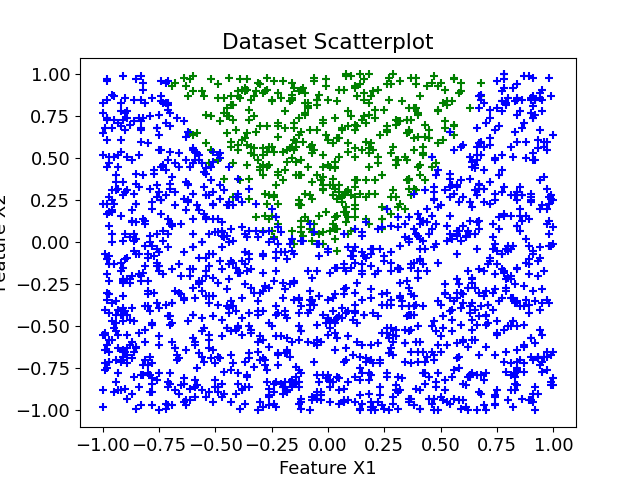

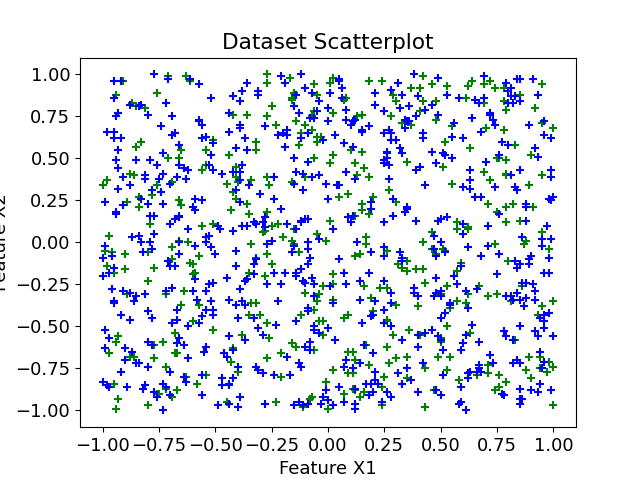

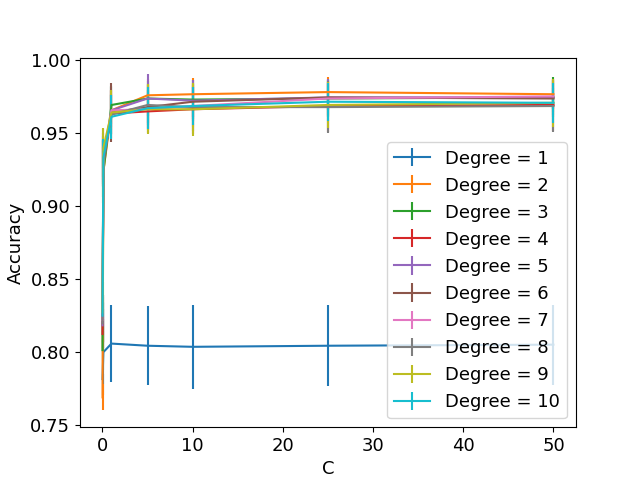

In [64]:


def best_poly_and_c(X, y):
    fig = plt.figure()
    poly_test = [1,2,3,4,5,6,7,8,9,10]
    c_test = [0.01,0.1,1,5,10,25,50]

    for p in poly_test:
        mean_err=[]; std_err=[]
        poly_x = PolynomialFeatures(p).fit_transform(X)
        poly_x_train, poly_x_test, y_train, y_test = train_test_split(poly_x, y)

        for c in c_test:
            log_reg = LogisticRegression(C=c, max_iter=10000000)
            scores = cross_val_score(log_reg, poly_x_train, y_train, cv=10)
            mean_err.append(np.array(scores).mean())
            std_err.append(np.array(scores).std())

        plt.errorbar(c_test, mean_err, yerr=std_err, label="Degree = {0}".format(p))
        plt.xlabel('C'); plt.ylabel('Accuracy')
        #plt.title('degree = ' + str(q))
        #plt.show()

    plt.legend()
    plt.show()
    return

X1, X2, y = read_data("week4.csv")
df1x = [X1, X2]
X=np.column_stack((X1,X2))
best_poly_and_c(X,y)


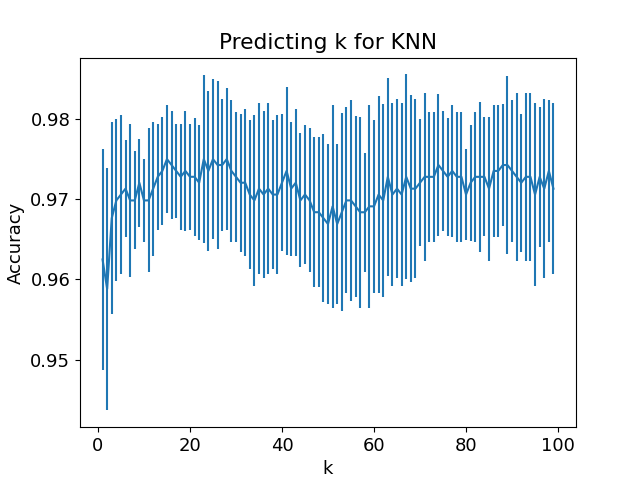

In [66]:
#i) b)

def knn(X,y):
    fig = plt.figure()
    x_train, x_test, y_train, y_test = train_test_split(X, y)

    mean_err=[]; std_err=[]; k_test=[]
    for k in range(1,100):
        k_test.append(k)

    for k in k_test:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
        mean_err.append(np.array(scores).mean())
        std_err.append(np.array(scores).std())

    plt.errorbar(k_test, mean_err, yerr=std_err)
    plt.xlabel('k'); plt.ylabel('Accuracy')
    plt.title('Predicting k for KNN')
    plt.show()
    
knn(X,y)